In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Old Pre-processing
from operator import index
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from fastai.tabular.all import df_shrink
from google.colab import data_table
from google.colab import files
from google.colab import drive
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

testing = '/content/drive/MyDrive/Testing/KDDTest+.csv'
training = '/content/drive/MyDrive/Testing/KDDTrain+.csv'

train = pd.read_csv(training, encoding='utf-8')
test = pd.read_csv(testing, encoding='utf-8')


train = df_shrink(train, skip=[], obj2cat=True, int2uint=True)
test = df_shrink(test, skip=[], obj2cat=True, int2uint=True)


feature_type_map = {f: (train.dtypes.loc[f], test.dtypes.loc[f]) for f in train.columns}

len(train['class'].cat.categories), len(test['class'].cat.categories)

len(train.service.cat.categories), len(test.service.cat.categories)

def train_test_category_union(feature):
  tcl = len(train[feature].cat.categories)
  tcll = len(test[feature].cat.categories)
  feature_cat_union = train[feature].cat.categories.union(test[feature].cat.categories)
  train[feature] = train[feature].cat.set_categories(feature_cat_union)
  test[feature] = test[feature].cat.set_categories(feature_cat_union)

cat = list(train.select_dtypes(include='category').columns.values)

for f in cat:
  train_test_category_union(f)

class_data_train = train['class']
#one hot encoding on all nominal categories except class
test = pd.get_dummies(test, columns=['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login'])
train = pd.get_dummies(train, columns=['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login'])

#label encoding for class column since it is the target variable
le = LabelEncoder()
train['classification'] = le.fit_transform(train['class'])
test['classification'] = le.fit_transform(test['class'])
train.drop('class', axis=1, inplace=True)
test.drop('class', axis=1, inplace=True)

#robust scaling for normalization step
robust_scaler1 = RobustScaler()
robust_scaler2 = RobustScaler()
#data1 = test.values[:, :-1]
data1 = test.values[:, :]
#data2 = train.values[:, :-1]
data2 = train.values[:, :]
data1 = robust_scaler1.fit_transform(data1)
data2 = robust_scaler2.fit_transform(data2)
#converting array back to dataframe
test = pd.DataFrame(data1)
train = pd.DataFrame(data2)

# X_train = train.drop('classification', axis=1)
# y_train = train['classification']
# X_test = test.drop('classification', axis=1)
# y_test = test['classification']


# # Standard Scaling for normalization step
# standard_scaler1 = StandardScaler()
# standard_scaler2 = StandardScaler()

# # use all columns (including classification, but we fix that below)
# data1 = test.values[:, :]
# data2 = train.values[:, :]

# # fit on train, transform both
# data1 = standard_scaler1.fit_transform(data1)
# data2 = standard_scaler2.fit_transform(data2)


# # convert back to DataFrame
# # test = pd.DataFrame(data1, columns=test.columns)
# test = pd.DataFrame(data1)
# # train = pd.DataFrame(data2, columns=train.columns)
# train = pd.DataFrame(data2)

# Preprocessing ends here

# print(test[126]).to_string(index=True)

Train set class distribution:
class
normal     67343
anomaly    58630
Name: count, dtype: int64
Total train instances: 125973

Test set class distribution:
class
anomaly    12833
normal      9711
Name: count, dtype: int64
Total test instances: 22544
Train set class distribution:
class
normal     67343
anomaly    58630
Name: count, dtype: int64
Total train instances: 125973

Test set class distribution:
class
anomaly    12833
normal      9711
Name: count, dtype: int64
Total test instances: 22544


In [ ]:
# New Pre-processing
from operator import index
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from fastai.tabular.all import df_shrink
from google.colab import data_table
from google.colab import files
from google.colab import drive
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.decomposition import  PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

testing = '/content/drive/MyDrive/Senior Database Files/KDDTest+.csv'
training = '/content/drive/MyDrive/Senior Database Files/KDDTrain+.csv'

train = pd.read_csv(training, encoding='utf-8')
test = pd.read_csv(testing, encoding='utf-8')

train = df_shrink(train, skip=[], obj2cat=True, int2uint=True)
test = df_shrink(test, skip=[], obj2cat=True, int2uint=True)

feature_type_map = {f: (train.dtypes.loc[f], test.dtypes.loc[f]) for f in train.columns}

len(train['class'].cat.categories), len(test['class'].cat.categories)

len(train.service.cat.categories), len(test.service.cat.categories)

def train_test_category_union(feature):
  tcl = len(train[feature].cat.categories)
  tcll = len(test[feature].cat.categories)
  feature_cat_union = train[feature].cat.categories.union(test[feature].cat.categories)
  train[feature] = train[feature].cat.set_categories(feature_cat_union)
  test[feature] = test[feature].cat.set_categories(feature_cat_union)

cat = list(train.select_dtypes(include='category').columns.values)

for f in cat:
  train_test_category_union(f)
le = LabelEncoder()
train['classification'] = le.fit_transform(train['class'])
test['classification'] = le.fit_transform(test['class'])
train.drop('class', axis=1, inplace=True)
test.drop('class', axis=1, inplace=True)
train['protocol_type'] = le.fit_transform(train['protocol_type'])
test['protocol_type'] = le.fit_transform(test['protocol_type'])
train['service'] = le.fit_transform(train['service'])
test['service'] = le.fit_transform(test['service'])
train['flag'] = le.fit_transform(train['flag'])
test['flag'] = le.fit_transform(test['flag'])
train['land'] = le.fit_transform(train['land'])
test['land'] = le.fit_transform(test['land'])
train['logged_in'] = le.fit_transform(train['logged_in'])
test['logged_in'] = le.fit_transform(test['logged_in'])
train['is_host_login'] = le.fit_transform(train['is_host_login'])
test['is_host_login'] = le.fit_transform(test['is_host_login'])
train['is_guest_login'] = le.fit_transform(train['is_guest_login'])
test['is_guest_login'] = le.fit_transform(test['is_guest_login'])

class_data_train = train['classification']

train_index = train.columns
mutual_info = mutual_info_classif(train, class_data_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_index
mutual_info.sort_values(ascending=False)
Select_features = SelectKBest(mutual_info_classif, k=30)
Select_features.fit(train, class_data_train)
new_col = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'classification']
train = train[new_col]
test = test[new_col]

#one hot encoding on all nominal categories except class
test = pd.get_dummies(test, columns=['protocol_type', 'service', 'flag', 'logged_in'])
train = pd.get_dummies(train, columns=['protocol_type', 'service', 'flag', 'logged_in'])

#robust scaling for normalization step
target_test = test['classification'].copy()
robust_scaler1 = RobustScaler()
robust_scaler2 = RobustScaler()
train.drop('classification', axis=1, inplace=True)
test.drop('classification', axis=1, inplace=True)
data1 = test.values[:, :]
data2 = train.values[:, :]
data1 = robust_scaler1.fit_transform(data1)
data2 = robust_scaler2.fit_transform(data2)
#converting array back to dataframe
test = pd.DataFrame(data1)
train = pd.DataFrame(data2)
#Preprocessing ends here

Train set class distribution:
class
normal     67343
anomaly    58630
Name: count, dtype: int64
Total train instances: 125973

Test set class distribution:
class
anomaly    12833
normal      9711
Name: count, dtype: int64
Total test instances: 22544


Original X_train rows: 125973
Original X_test rows:  22544
Original TOTAL rows:   148517
Train anomaly:  50024
Train normal:  53937
Test anomaly:  21439
Test normal:  23117

Class imbalance ratio (normal/anomaly): 1.08

XGBoost Anomaly Detection Results
0 = Anomaly, 1 = Normal
Accuracy: 0.9933
ROC AUC: 0.9933

Classification Report:
              precision    recall  f1-score   support

 Anomaly (0)       0.99      0.99      0.99     21439
  Normal (1)       0.99      0.99      0.99     23117

    accuracy                           0.99     44556
   macro avg       0.99      0.99      0.99     44556
weighted avg       0.99      0.99      0.99     44556



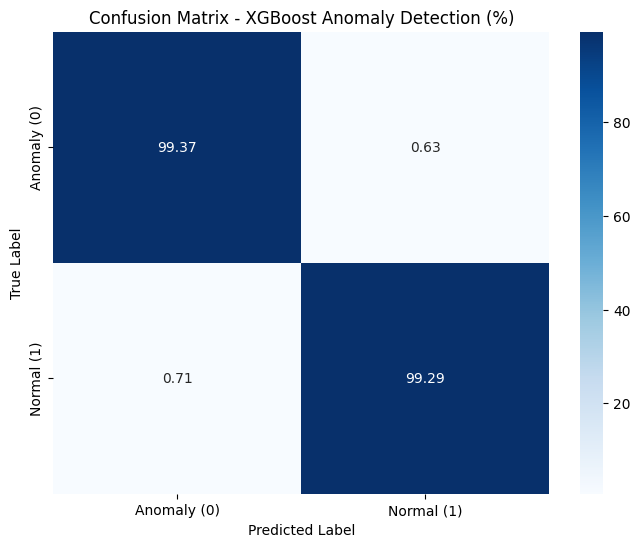

       0
0      0
1      0
2      1
3      1
4      1
5      0
6      1
7      0
8      1
9      0
10     0
11     1
12     0
13     0
14     0
15     0
16     1
17     0
18     0
19     0
20     1
21     1
22     0
23     0
24     0
25     0
26     1
27     0
28     0
29     0
30     0
31     1
32     0
33     1
34     0
35     1
36     0
37     0
38     1
39     1
40     1
41     1
42     0
43     1
44     0
45     0
46     0
47     0
48     1
49     0
50     1
51     0
52     0
53     0
54     1
55     0
56     1
57     1
58     0
59     1
60     1
61     0
62     0
63     0
64     0
65     0
66     1
67     1
68     0
69     1
70     0
71     0
72     1
73     1
74     0
75     0
76     1
77     1
78     0
79     1
80     0
81     0
82     0
83     1
84     1
85     0
86     1
87     1
88     0
89     1
90     0
91     0
92     1
93     0
94     1
95     1
96     0
97     0
98     0
99     1
100    0
101    0
102    0
103    1
104    0
105    1
106    1
107    0
108    0
109    1
1

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

y_train_orig = train.iloc[:, -1]
y_test_orig = test.iloc[:, -1]

# Set -1 → 0 (anomaly), 0 → 1 (normal)
y_train_mapped = np.where(y_train_orig == -1, 0, 1)

# Set 0 → 0 (anomaly), 1 → 1 (normal)
y_test_mapped = np.where(y_test_orig == 0, 0, 1)


# Prepare features
X_train = train.iloc[:, :-1]
X_test = test.iloc[:, :-1]

print(f"Original X_train rows: {len(X_train)}")
print(f"Original X_test rows:  {len(X_test)}")
print(f"Original TOTAL rows:   {len(X_train) + len(X_test)}")

# Good for model development but not good if we want this to be realistic.
# Combine all data and create a proper split
X_combined = pd.concat([X_train, X_test], axis=0)
y_combined = np.concatenate([y_train_mapped, y_test_mapped], axis=0)

# Create stratified split to maintain class distribution
X_train, X_test, y_train_mapped, y_test_mapped = train_test_split(
    X_combined, y_combined,
    test_size=0.3,
    stratify=y_combined,
    random_state=42
)

# Calculate scale_pos_weight for handling class imbalance
anomaly_count = np.sum(y_train_mapped == 0)
normal_count = np.sum(y_train_mapped == 1)
test_anomaly_count = np.sum(y_test_mapped == 0)
test_normal_count = np.sum(y_test_mapped == 1)
scale_pos_weight = normal_count / anomaly_count # if anomaly_count > 0 else 1

print("Train anomaly: ", anomaly_count)
print("Train normal: ", normal_count)
print("Test anomaly: ", test_anomaly_count)
print("Test normal: ", test_normal_count)

print(f"\nClass imbalance ratio (normal/anomaly): {scale_pos_weight:.2f}")

# Better curve, worse %
# Initialize and train XGBoost classifier

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=400,     # Num of trees
    max_depth=2,          # Max tree depth
    learning_rate=0.13,    # How quick it learns
    subsample=0.9,        # % of data per tree
    colsample_bytree=0.9, # % of features per tree
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss'  # Evaluation metric
)


# Better curve, worse %
# xgb_model = xgb.XGBClassifier(
#     objective='binary:logistic',
#     n_estimators=100,     # Num of trees
#     max_depth=5,          # Max tree depth
#     learning_rate=0.1,    # How quick it learns
#     subsample=0.6,        # % of data per tree
#     colsample_bytree=0.6, # % of features per tree
#     random_state=42,
#     scale_pos_weight=scale_pos_weight,
#     eval_metric='logloss'  # Evaluation metric
# )




#Better %, worse curve?
# # Initialize and train XGBoost classifier
# xgb_model = xgb.XGBClassifier(
#     objective='binary:logistic',
#     n_estimators=400,     # Num of trees
#     max_depth=12,          # Max tree depth
#     learning_rate=0.15,    # How quick it learns
#     subsample=0.9,        # % of data per tree
#     colsample_bytree=0.9, # % of features per tree
#     random_state=42,
#     scale_pos_weight=scale_pos_weight,
#     eval_metric='logloss'  # Evaluation metric
# )


# Train the model
xgb_model.fit(
    X_train,
    y_train_mapped,
    eval_set=[(X_test, y_test_mapped)], # Evaluate on test set during training
    verbose=0
)

# Make predictions
y_pred = xgb_model.predict(X_test) # Final classifications (0 or 1)
y_pred_proba = xgb_model.predict_proba(X_test) # Probability scores for both classes

# Probability of being an anomaly (class 0)
y_pred_proba_anomaly = y_pred_proba[:, 0]

# Evaluate the model
print("\n" + "="*50)
print("XGBoost Anomaly Detection Results")
print("="*50)
print("0 = Anomaly, 1 = Normal")

print(f"Accuracy: {accuracy_score(y_test_mapped, y_pred):.4f}")


print(f"ROC AUC: {roc_auc_score(y_test_mapped, y_pred):.4f}")

print("\nClassification Report:")
print(classification_report(y_test_mapped, y_pred, target_names=['Anomaly (0)', 'Normal (1)']))



# Calculate confusion matrix
cm = confusion_matrix(y_test_mapped, y_pred)

# Convert to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# print("\nConfusion Matrix (Percentages):")
# print(cm_percentage)

# Plot confusion matrix with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Anomaly (0)', 'Normal (1)'],
            yticklabels=['Anomaly (0)', 'Normal (1)'])
plt.title('Confusion Matrix - XGBoost Anomaly Detection (%)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print out the values
n = pd.DataFrame(y_pred)
print(n)



In [ ]:
print(f"Original X_train rows: {len(X_train)}")
print(f"Original X_test rows:  {len(X_test)}")
print(f"Original TOTAL rows:   {len(X_train) + len(X_test)}")

print(f"Original y_train rows: {len(y_train_mapped)}")
print(f"Original y_test rows:  {len(y_test_mapped)}")
print(f"Original TOTAL labels: {len(y_train_mapped) + len(y_test_mapped)}")

Original X_train rows: 103961
Original X_test rows:  44556
Original TOTAL rows:   148517
Original y_train rows: 103961
Original y_test rows:  44556
Original TOTAL labels: 148517


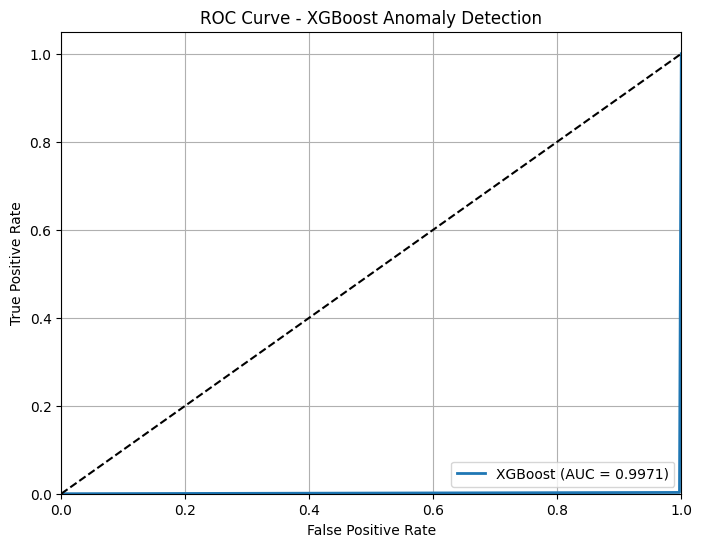

In [ ]:
# Plot ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_mapped, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(tpr, fpr, linewidth=2, label=f'XGBoost (AUC = {roc_auc_score(y_test_mapped, y_pred):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Anomaly Detection')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

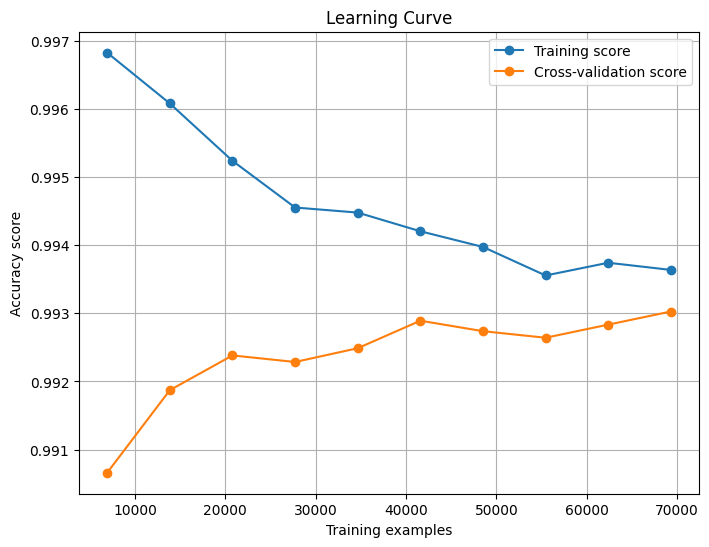

In [ ]:
# Learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_train, y_train_mapped, cv=3,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Accuracy score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

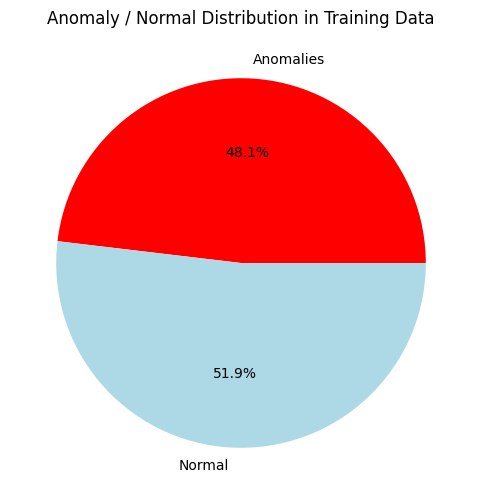

In [ ]:
# Class distribution
plt.figure(figsize=(8, 6))
class_counts = [np.sum(y_train_mapped == 0), np.sum(y_train_mapped == 1)]
plt.pie(class_counts, labels=['Anomalies', 'Normal'], autopct='%1.1f%%', colors=['red', 'lightblue'])
plt.title('Anomaly / Normal Distribution in Training Data')
plt.show()

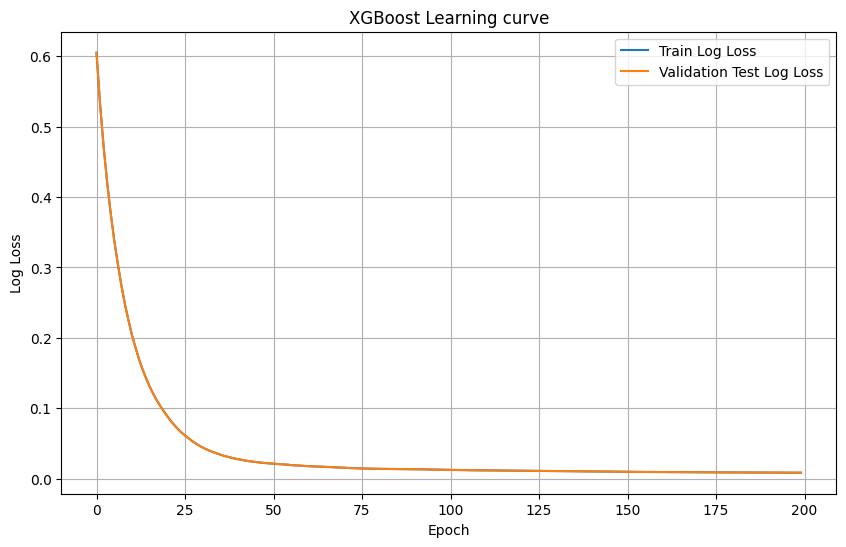

In [ ]:
results = xgb_model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, results['validation_0']['logloss'], label='Train Log Loss')
plt.plot(x_axis, results['validation_0']['logloss'], label='Validation Test Log Loss')
plt.title('XGBoost Learning curve')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Prepare features and target for XGBoost
X_train_for_model = train
y_train_for_model = class_data_train

# Train a quick XGBoost model to get feature importance
xgb_temp = xgb.XGBClassifier(n_estimators=50, random_state=42)
xgb_temp.fit(X_train_for_model, y_train_for_model)

# Create importance_df
feature_importance = xgb_temp.feature_importances_
feature_names = [f"feature_{i}" for i in range(X_train_for_model.shape[1])]

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

# Get top 20 feature indices from importance_df
top_20_indices = importance_df.head(20).index
top_20_feature_names = importance_df.head(20)['feature'].values

print(f"Top 20 feature names: {list(top_20_feature_names)}")

# Extract the top 20 features from X_train
X_train_top20 = train.iloc[:, top_20_indices]

# Calculate correlation matrix
corr_matrix = X_train_top20.corr()

# Create the heatmap with feature names
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            xticklabels=top_20_feature_names,
            yticklabels=top_20_feature_names,
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Heatmap - Top 20 Most Important Features', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['anomaly' 'normal']